質問：もし、いいゲームがあるけど。。。商売なかった？

In [46]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# データを読みこむ
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [6]:
len(games)

16719

In [10]:
len(games.columns)

16

列はそんなにないので、どちらの変数を分析することが肉眼で判断できる。

In [12]:
# 欠損値があるかどうか
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

欠損値はいっぱいある。どうして、year_of_release()には欠損値があるのだろう？は簡単に知ることができるんじゃないか？
そして、 critic_score, critic_count,user_score,user_count,developer,ratingには欠損値が　1/2があるので、使えるかどうか。

In [14]:
# データを見る
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


最大商売されたゲームはどれ？どれが最小商売だか？ グローバルセールズではね。

Critic_Scoreと商売の変数には相関関係が存在する？

In [18]:
# 最大
g_max = games.Global_Sales.idxmax()
# -- データには順番がすでにある？
# ---どうやって確認する？
games.iloc[g_max]

Name               Wii Sports
Platform                  Wii
Year_of_Release          2006
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales              8.45
Global_Sales            82.53
Critic_Score               76
Critic_Count               51
User_Score                  8
User_Count                322
Developer            Nintendo
Rating                      E
Name: 0, dtype: object

In [19]:
# 最小
g_min = games.Global_Sales.idxmin()
games.iloc[g_min]

Name               Football Manager 2007
Platform                            X360
Year_of_Release                      NaN
Genre                             Sports
Publisher                           Sega
NA_Sales                               0
EU_Sales                            0.01
JP_Sales                               0
Other_Sales                            0
Global_Sales                        0.01
Critic_Score                         NaN
Critic_Count                         NaN
User_Score                           NaN
User_Count                           NaN
Developer                            NaN
Rating                               NaN
Name: 16081, dtype: object

ここで、セールズの変数はどういう意味するのを知るべきだというの気がつく。

In [20]:
# データには順番があるかどうか
games.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 順番は？
games.Global_Sales.is_monotonic_decreasing

True

やっぱり！他の変数は？

In [22]:
# 商売の変数に順番がある？
games.NA_Sales.is_monotonic_decreasing

False

In [23]:
games.EU_Sales.is_monotonic_decreasing

False

In [24]:
games.JP_Sales.is_monotonic_decreasing

False

In [25]:
games.Other_Sales.is_monotonic_decreasing

False

他の変数には順番なし。

ここでアイデアがあった。もし、欠損値は商売されなかったゲームから来たとしたら？

In [26]:
# 各々の所（）の商売
games.iloc[games.NA_Sales.idxmax()]

Name               Wii Sports
Platform                  Wii
Year_of_Release          2006
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales              8.45
Global_Sales            82.53
Critic_Score               76
Critic_Count               51
User_Score                  8
User_Count                322
Developer            Nintendo
Rating                      E
Name: 0, dtype: object

In [27]:
games.iloc[games.EU_Sales.idxmax()]

Name               Wii Sports
Platform                  Wii
Year_of_Release          2006
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales              8.45
Global_Sales            82.53
Critic_Score               76
Critic_Count               51
User_Score                  8
User_Count                322
Developer            Nintendo
Rating                      E
Name: 0, dtype: object

In [28]:
games.iloc[games.JP_Sales.idxmax()]

Name               Pokemon Red/Pokemon Blue
Platform                                 GB
Year_of_Release                        1996
Genre                          Role-Playing
Publisher                          Nintendo
NA_Sales                              11.27
EU_Sales                               8.89
JP_Sales                              10.22
Other_Sales                               1
Global_Sales                          31.37
Critic_Score                            NaN
Critic_Count                            NaN
User_Score                              NaN
User_Count                              NaN
Developer                               NaN
Rating                                  NaN
Name: 4, dtype: object

このゲームは商売できたが、批判のデータなし。。。

In [29]:
games.iloc[games.Other_Sales.idxmax()]

Name               Grand Theft Auto: San Andreas
Platform                                     PS2
Year_of_Release                             2004
Genre                                     Action
Publisher                   Take-Two Interactive
NA_Sales                                    9.43
EU_Sales                                     0.4
JP_Sales                                    0.41
Other_Sales                                10.57
Global_Sales                               20.81
Critic_Score                                  95
Critic_Count                                  80
User_Score                                     9
User_Count                                  1588
Developer                         Rockstar North
Rating                                         M
Name: 17, dtype: object

other_salesとは何だろう？

In [30]:
# 誰が編集した()？
games.Publisher.value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Abylight                           1
Interchannel-Holon                 1
Pack In Soft                       1
HAL Laboratory                     1
Culture Publishers                 1
Name: Publisher, Length: 582, dtype: int64

In [31]:
# Ratings
games.Rating.value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

これらのレーチングはどういう意味？

もし、批判との相関関係を探ったら、欠損値を消す。。。

In [34]:
# 欠損値なしのdfを作る
games_c = games.dropna()

In [36]:
games_c.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [37]:
games_c.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


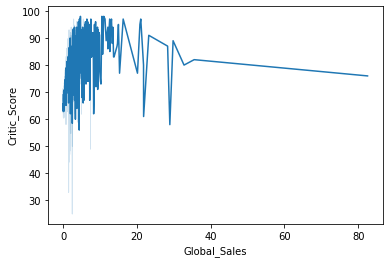

In [52]:
%matplotlib inline
sns.lineplot(games_c.Global_Sales,games_c.Critic_Score) # この可視化はふさわしくないかもね。

In [53]:
games_c.Global_Sales.corr(games_c.Critic_Score)

0.23755572228274255

In [54]:
games_c.Global_Sales.corr(games_c.User_Score)

0.088348526346967243

In [55]:
games_c.Global_Sales.corr(games_c.Critic_Count)

0.29039668469749591